In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model

In [7]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Simple Autoencoder

In [4]:
latent_dim = 2
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28,28))
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
autoencoder = Autoencoder(latent_dim)

#autoencoder = Sequential()
#encoder
    #autoencoder.add(layers.Flatten(input_shape(28,28)))
    #autoencoder.add(layers.Dense(latent_dim, activatino='relu'))
    
#decoder
    #autoencoder.add(layers.Dense(784, activation='relu'))
    #autoencoder.add(layers.Reshape((28,28)))
        

In [5]:
autoencoder.compile(optimizer='adam', loss='mse')

In [8]:
autoencoder.fit(x_train, x_train,
               epochs = 10,
               shuffle = True,
               validation_data = (x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0669 - val_loss: 0.0575
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0540 - val_loss: 0.0504
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0481 - val_loss: 0.0461
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0453 - val_loss: 0.0446
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0446 - val_loss: 0.0443
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0444 - val_loss: 0.0445
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0443 - val_loss: 0.0441
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0442 - val_loss: 0.0441
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0442 - val_loss: 0.0441
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.044

In [9]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 2)                 1570      
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            2352      
                                                                 
Total params: 3922 (15.32 KB)
Trainable params: 3922 (15.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

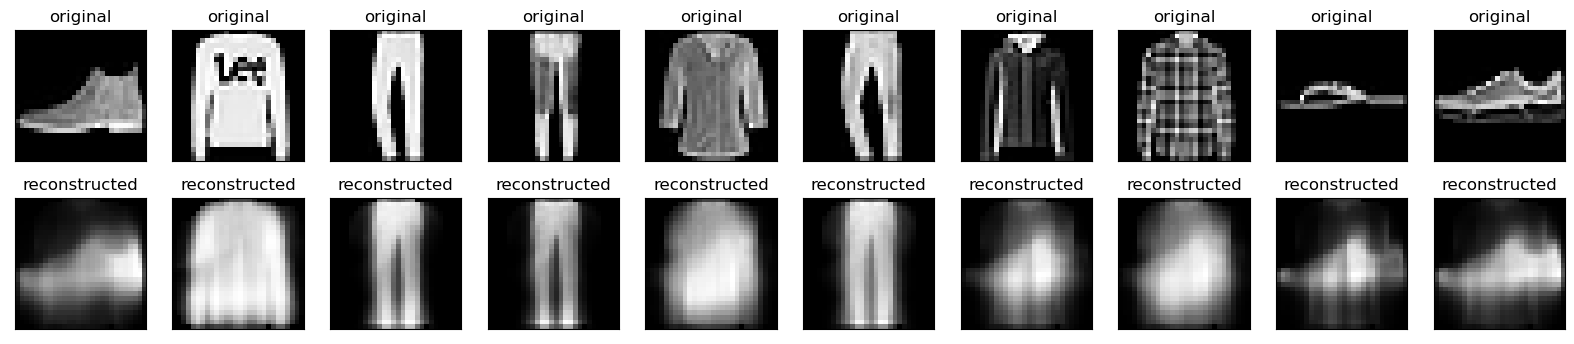

In [11]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #define reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## PCA

In [12]:
pca_train = x_train.reshape(x_train.shape[0], 28*28)
pca_test = x_test.reshape(x_test.shape[0], 28*28)

In [14]:
pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(pca_test)
x_pca_inv = pca.inverse_transform(x_test_pca[:,:64])

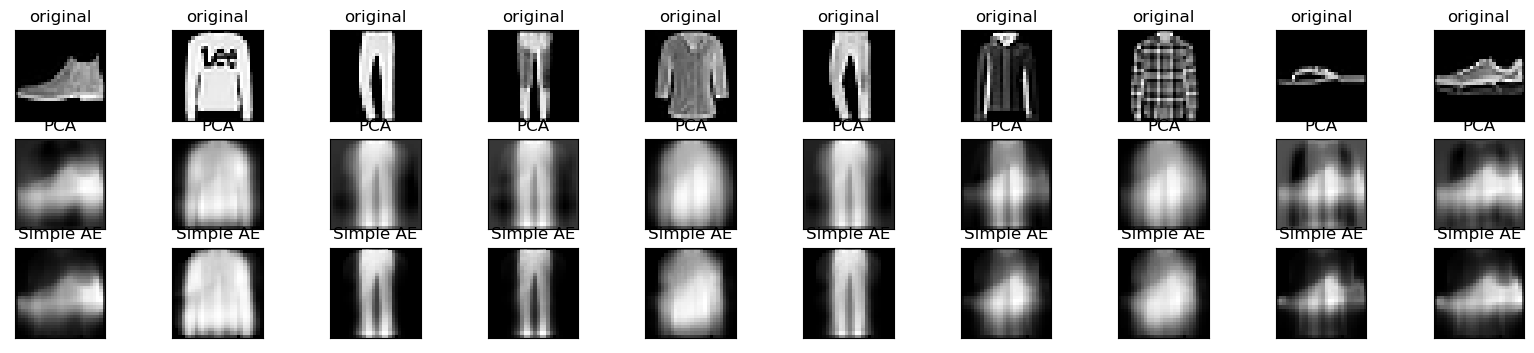

In [15]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #define PCA reconstruction
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(x_pca_inv[i].reshape(28,28))
    plt.title("PCA")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display AE reconstruction
    ax = plt.subplot(3, n, i+1+n+n)
    plt.imshow(decoded_imgs[i])
    plt.title("Simple AE")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [16]:
latent_dim = 2
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = Sequential([
            layers.Flatten(),
            layers.Dense(100, activation='relu'),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = Sequential([
            layers.Dense(100, activation='relu'),
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28,28))
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
autoencoder = Autoencoder(latent_dim)

In [17]:
autoencoder.compile(optimizer='adam', loss='mse')

In [19]:
autoencoder.fit(x_train, x_train,
               epochs = 10,
               shuffle=True,
               validation_data = (x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0515 - val_loss: 0.0364
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0350 - val_loss: 0.0337
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0332 - val_loss: 0.0325
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0323 - val_loss: 0.0321
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0317 - val_loss: 0.0313
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0312 - val_loss: 0.0309
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0308 - val_loss: 0.0305
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0304 - val_loss: 0.0301
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0301 - val_loss: 0.0302
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.02

In [24]:
encoded2_imgs = autoencoder.encoder(x_test).numpy()
decoded2_imgs = autoencoder.decoder(encoded2_imgs).numpy()

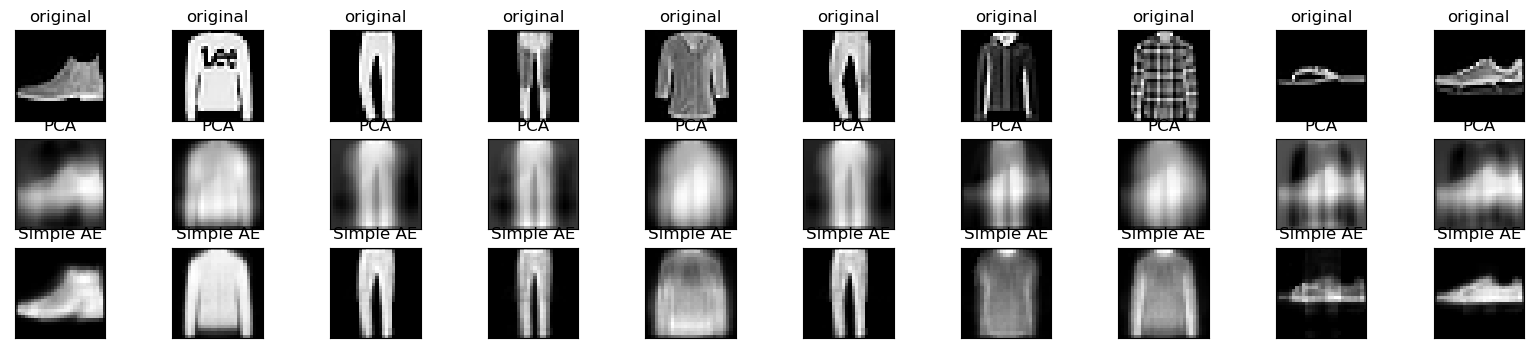

In [26]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #define PCA reconstruction
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(x_pca_inv[i].reshape(28,28))
    plt.title("PCA")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display AE reconstruction
    ax = plt.subplot(3, n, i+1+n+n)
    plt.imshow(decoded2_imgs[i])
    plt.title("Simple AE")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()